# Data Exploration and Analysis

This notebook explores the Iris dataset and prepares it for model training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import os


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = [target_names[i] for i in y]

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (150, 6)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Basic statistics
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nTarget distribution:")
print(df['species'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8000

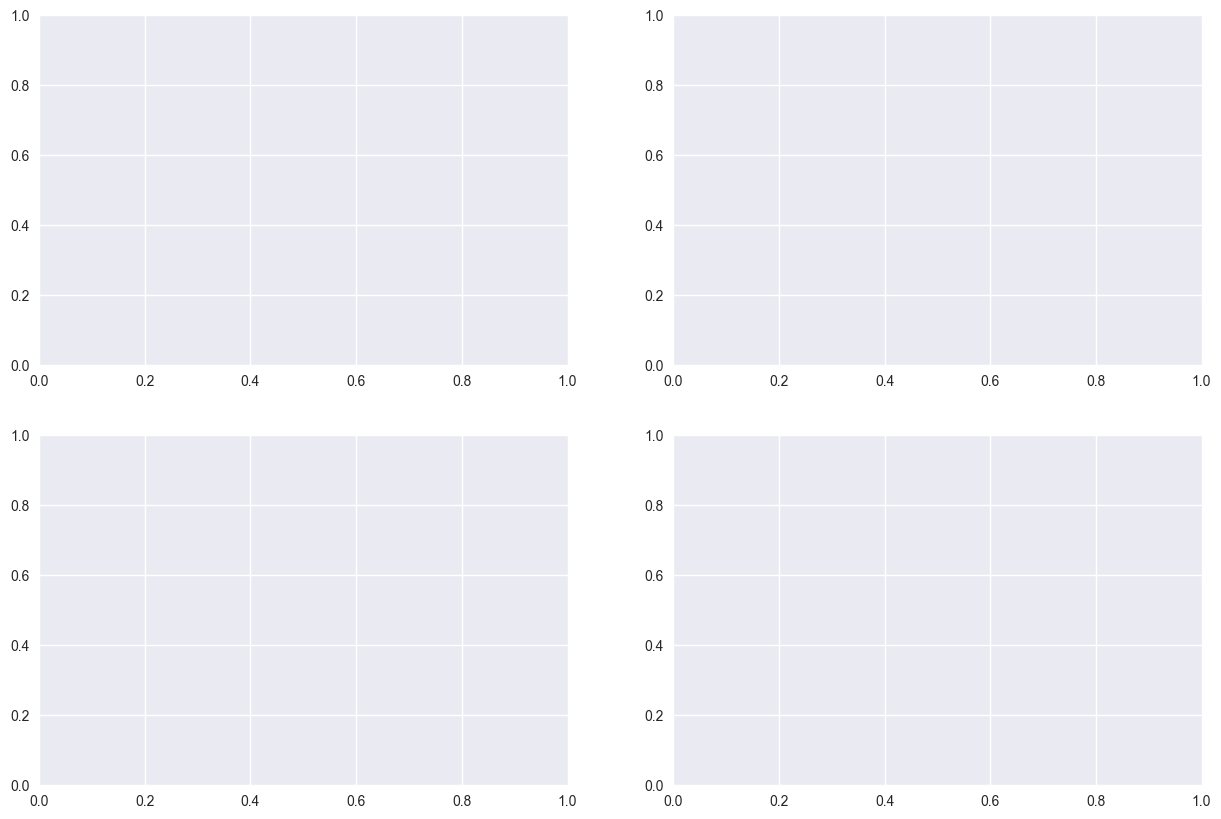

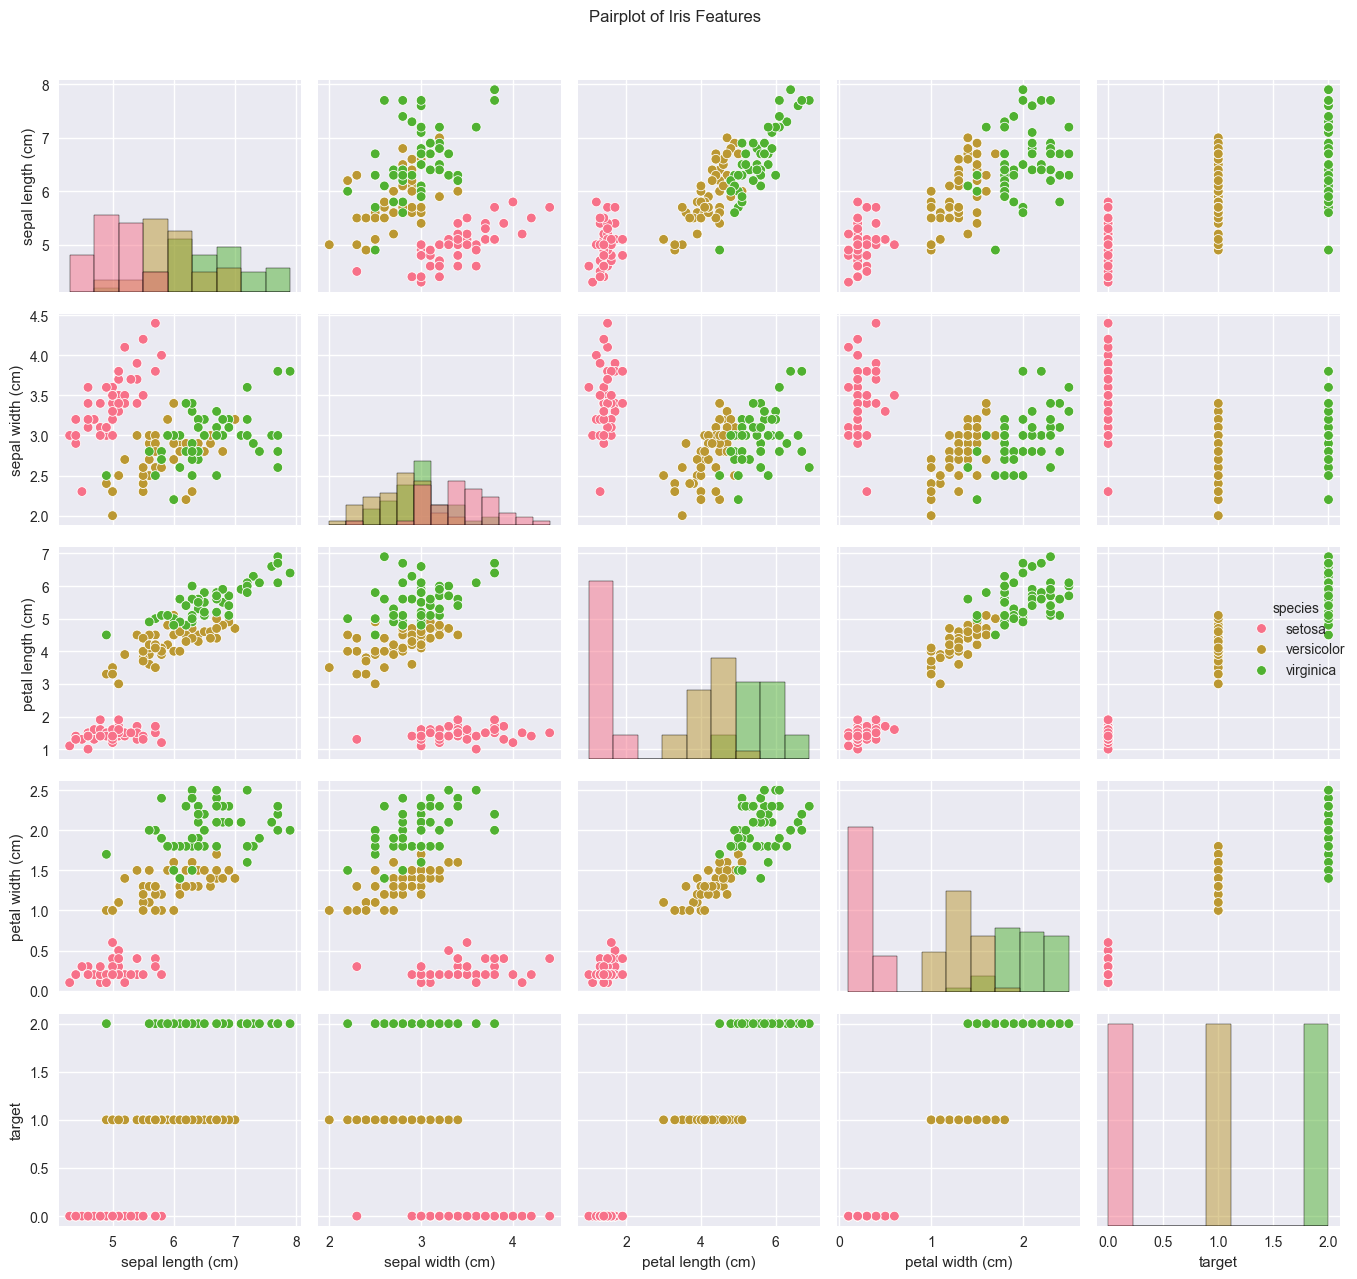

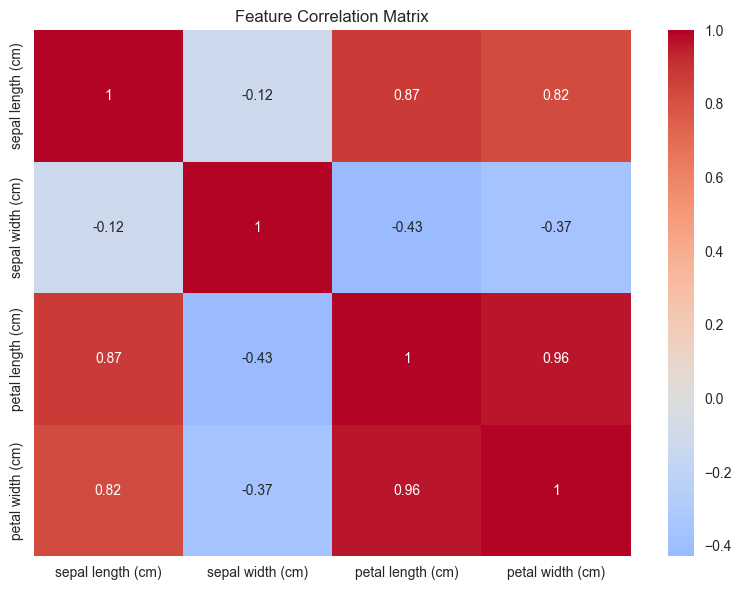

In [4]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Pairplot of features
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.tight_layout()
plt.savefig('../results/iris_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop(['target', 'species'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../results/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {len(np.unique(y))}")

# Save the splits for later use
np.save('../data/X_train.npy', X_train)
np.save('../data/X_test.npy', X_test)
np.save('../data/y_train.npy', y_train)
np.save('../data/y_test.npy', y_test)

print("\nData splits saved to data/ directory")

Training set size: 120
Test set size: 30
Features: 4
Classes: 3

Data splits saved to data/ directory
